In [1]:
file = open('files/ch03/adult.data', 'r')
def chr_int(a):
    if a.isdigit():return int(a)
    else: return 0
data = []
for line in file:
    data1 = line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]), data1[1],
                   chr_int(data1[2]), data1[3],
                   chr_int(data1[4]), data1[5],
                   data1[6], data1[7], data1[8],
                   data1[9], chr_int(data1[10]),
                   chr_int(data1[11]),
                   chr_int(data1[12]),
                   data1[13], data1[14]] )
print(data[0:2])

[[39, 'State-gov', 77516, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 2174, 0, 40, 'United-States', '<=50K\n'], [50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [2]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt', 
    'education', 'education_num', 'marital',
    'occupation', 'relationship', 'race', 
    'sex', 'capital_gain', 'capital_loss', 
    'hr_per_week', 'country', 'income'
    ]

In [3]:
df.shape

(32561, 15)

In [4]:
counts = df.groupby('country').size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [5]:
sx = df.groupby('sex').size()
sx

sex
Female    10771
Male      21790
dtype: int64

In [6]:
ml = df[(df.sex == 'Male')]
ml

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n


In [7]:
ml1 = df[(df.sex == 'Male') & (df.income=='>50K\n')]

In [8]:
ml1

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K\n
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K\n
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n


In [9]:
fm = df[(df.sex=='Female')]
fm.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K\n
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K\n
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K\n


In [10]:
fm1 = df[(df.sex=='Female') & (df.income == '>50K\n')]
fm1.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K\n
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K\n
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K\n
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K\n


In [11]:
df1 = df[df.income=='>50K\n']
print('The rate of people with hight income is: ',
     int(len(df1)/float(len(df))*100), '%')

The rate of people with hight income is:  24 %


In [12]:
print('The rate of men with high income: ',
     int((float(len(ml1))/len(ml))*100), '%')

The rate of men with high income:  30 %


In [13]:
print(f'The rate of women with high income: {int(float(len(fm1))/len(fm)*100)}%')

The rate of women with high income: 10%


In [14]:
print('The average age of men is: ', ml['age'].mean())
print('The average age of women is: ', fm['age'].mean())
print('The average age of high-income men is: ', ml1['age'].mean())
print('The average age of high-income women is: ', fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


In [15]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print('Statistics of age for men: mu: ', ml_mu, 'var: ', ml_var, 'std: ',ml_std)
print('Statistics of age for men: mu: ', fm_mu, 'var: ', fm_var, 'std: ',fm_std)

Statistics of age for men: mu:  39.43354749885268 var:  178.77375174530096 std:  13.37063019252649
Statistics of age for men: mu:  36.85823043357163 var:  196.3837063948037 std:  14.01369709943824


In [16]:
df


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [17]:
df['hr_per_week'].max()

99

In [18]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print('Median age per men and women are: \n', ml_median, fm_median)


Median age per men and women are: 
 38.0 35.0


In [19]:
ml1

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K\n
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K\n
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n


In [20]:
ml_median_hi = ml1['age'].median()
fm_median_hi = fm1['age'].median()
print('The median age of high-income male and female are: ', ml_median_hi, fm_median_hi)

The median age of high-income male and female are:  44.0 41.0


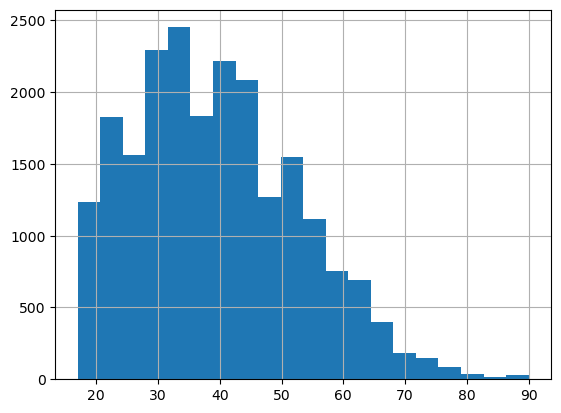

In [21]:
import matplotlib.pyplot as plt
ml_age = ml['age']
ml_age.hist(histtype = 'stepfilled', bins = 20)
plt.show()

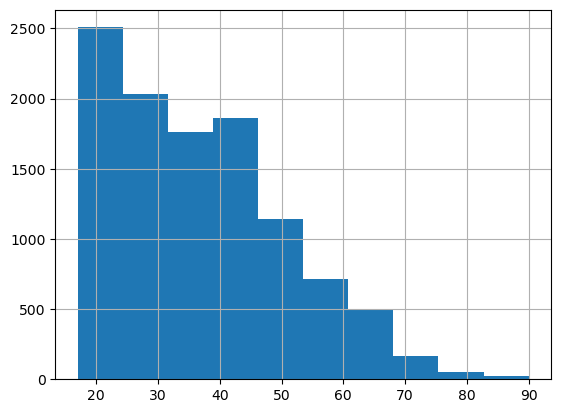

In [22]:
fm_age = fm['age']
fm_age.hist(histtype = 'stepfilled', bins = 10)
plt.show()

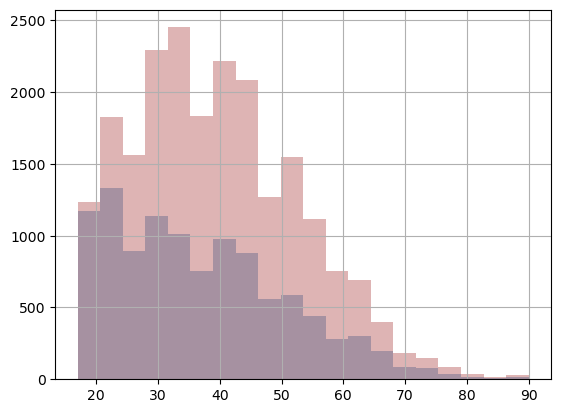

In [23]:
import seaborn as sns
fm_age.hist(histtype = 'stepfilled',
           alpha = .5, bins = 20)
ml_age.hist(histtype = 'stepfilled',
           alpha = 0.5,
           color = sns.desaturate('indianred', 0.75),
           bins = 20)
plt.show()

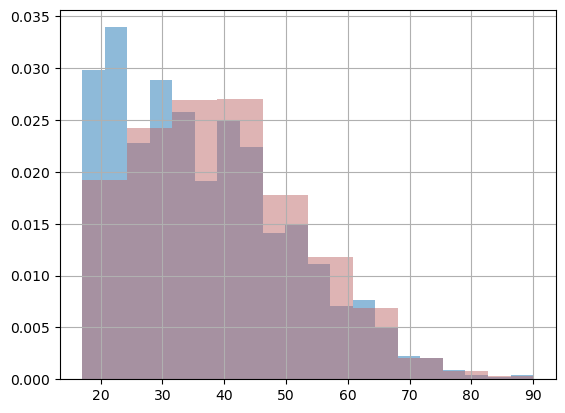

In [24]:
fm_age.hist(density = True,
            histtype = 'stepfilled',
            alpha = .5, bins = 20)
ml_age.hist(
           density = True,
           histtype = 'stepfilled',
           alpha = 0.5,
           color = sns.desaturate('indianred', 0.75),
           bins = 10)
plt.show()

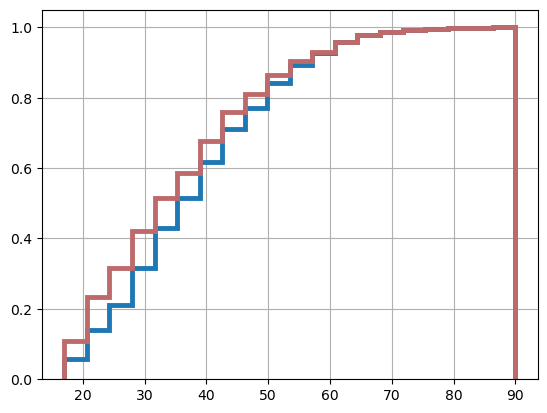

In [25]:
ml_age.hist(density = True, histtype = 'step', cumulative = True, linewidth = 3.5, bins = 20)
fm_age.hist(density = True, histtype = 'step', cumulative = True, linewidth = 3.5, bins = 20,
           color = sns.desaturate('indianred', .75))
plt.show()

In [26]:
df['age'].min()

17

In [27]:
df2 = df.drop(df.index[
              (df.income == '>50K\n') &
              ((df['age'] > df['age'].median()+35) |
              (df['age'] < df['age'].median()-15))
            ])
df2

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [28]:
ml1_age = ml1['age']
ml1

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K\n
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K\n
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n


In [29]:
ml1_age

7        52
9        42
10       37
11       30
14       40
         ..
32532    34
32533    54
32539    71
32554    53
32557    40
Name: age, Length: 6662, dtype: int64

In [30]:
fm1_age = fm1['age']
ml2_age = ml1_age.drop(ml1_age.index[
                       (ml1_age > df['age'].median()+35)|
                       (ml1_age < df['age'].median() - 15)
                    ])
fm2_age = fm1_age.drop(fm1_age.index[
                       (fm1_age > df['age'].median()+35)|
                       (fm1_age < df['age'].median() - 15)
                    ])

In [31]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

print('Men statistics:')
print('Mean: ', mu2ml, 'Std: ', std2ml, 'Median: ', md2ml)
print('Min: ', ml2_age.min(), 'Max: ', ml2_age.max())

print('Women statistics:')
print('Mean: ', mu2fm, 'Std: ', std2fm, 'Median: ', md2fm)
print('Min: ', fm2_age.min(), 'Max: ', fm2_age.max())


Men statistics:
Mean:  44.325352326110014 Std:  10.012302742491952 Median:  44.0
Min:  22 Max:  72
Women statistics:
Mean:  41.93236301369863 Std:  9.989525648849213 Median:  41.0
Min:  22 Max:  72


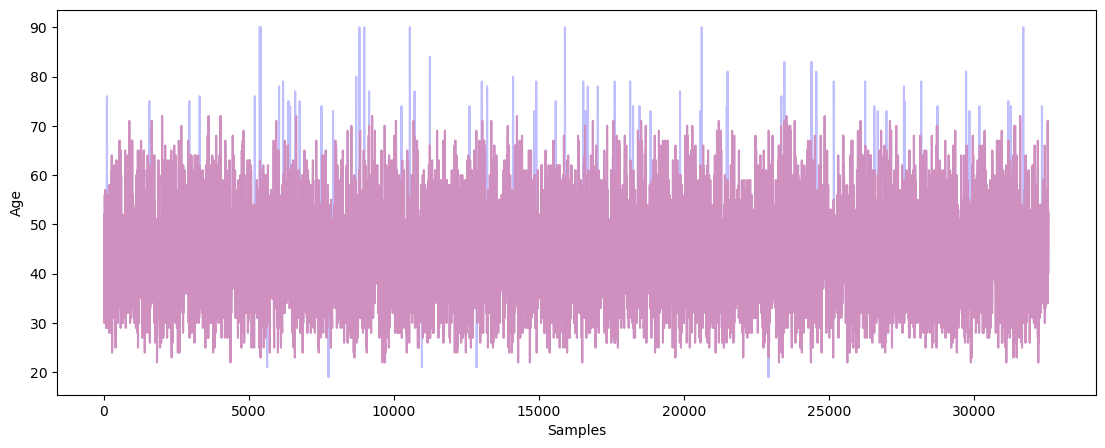

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.4, 5))
df.age[(df.income == '>50K\n')].plot(alpha=0.25, color='b')
df2.age[(df2.income == '>50K\n')].plot(alpha=0.25, color='r')
plt.ylabel('Age')
plt.xlabel('Samples')
plt.show()

In [33]:
import numpy as np
countx, divisionx = np.histogram(ml2_age, density=True)
countx

array([0.00390968, 0.01642673, 0.02773147, 0.03545992, 0.03661161,
       0.03206546, 0.02182149, 0.01557812, 0.00691014, 0.00348538])

In [34]:
divisionx

array([22., 27., 32., 37., 42., 47., 52., 57., 62., 67., 72.])

In [35]:
county, divisiony = np.histogram(fm2_age, density=True)

val = []
for i in range(len(divisionx)-1):
    avg = (divisionx[i]+division[i+1])/2
    val.append(avg)

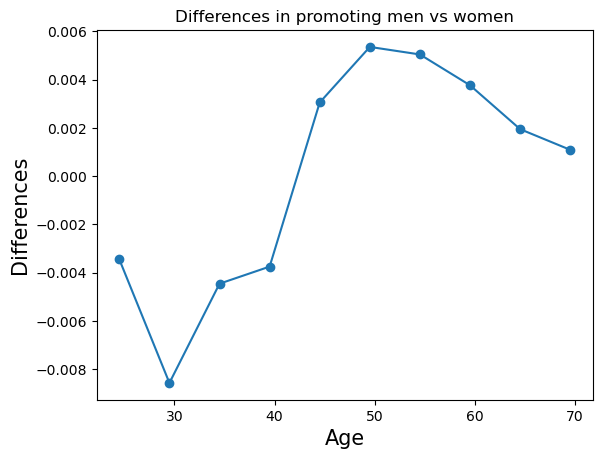

In [36]:
val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Differences', fontsize=15)
plt.title('Differences in promoting men vs women')
plt.show()

In [37]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

print("The skewness of the male population is:", skewness(ml2_age))
print("The skewness of the female population is:", skewness(fm2_age))

The skewness of the male population is: 0.2692767474998042
The skewness of the female population is: 0.4021179824911583


In [38]:
print('The mean difference with outliers is: %4.2f.' % (ml_age.mean()-fm_age.mean()))
print('The mean difference without outliers is: %4.2f.' % (ml2_age.mean()-fm2_age.mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.39.


In [39]:
#pearson's skewness coffs
def g_p(x):
    3*(x.mean()-x.median())/x.std()
print(g_p(ml2_age))
print(g_p(fm2_age))

None
None


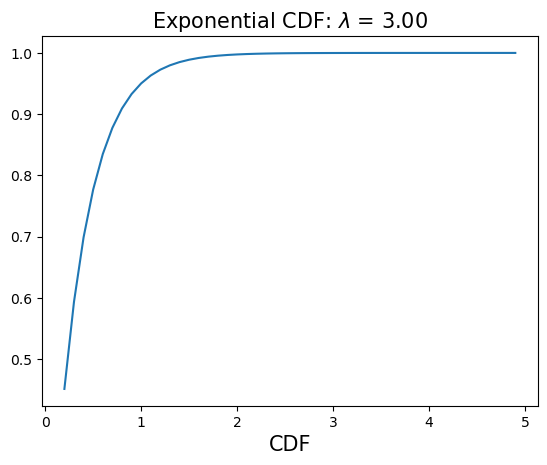

In [40]:
l = 3
x = np.arange(.2, 5.0, 0.1)
y = 1 - np.exp(-l*x)
plt.plot(x, y, '-')
plt.title('Exponential CDF: $\lambda$ = %.2f' %l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.xlabel('CDF', fontsize=15)
plt.show()

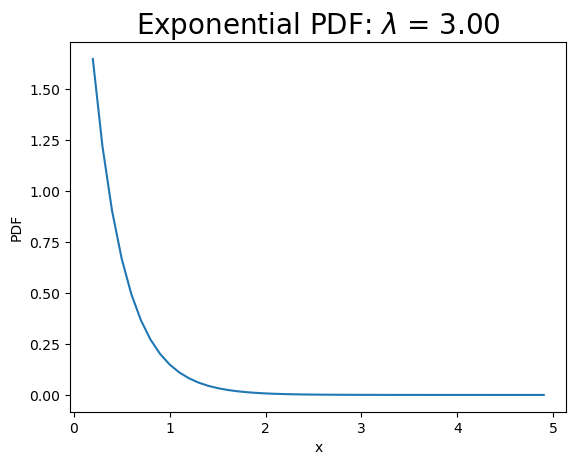

In [41]:
from __future__ import division
import scipy.stats as stats

l = 3
x = np.arange(0.2, 5.0, 0.1)
y = l*np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ = %0.2f' %l, fontsize = 20)
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

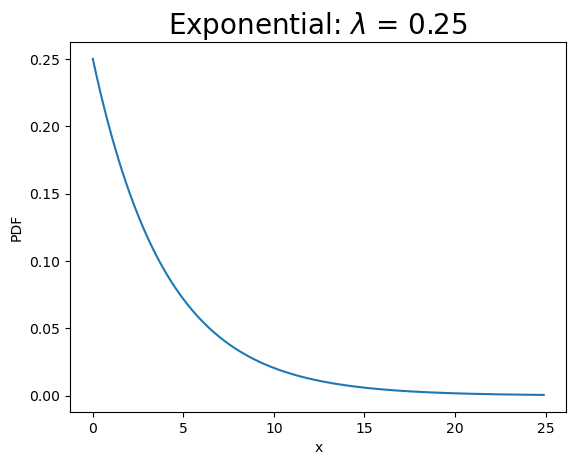

In [42]:
l = 0.25
x = np.arange(0, 25, .1)
y = 0.25*np.exp(-x*l)
plt.plot(x, y, '-')
plt.title('Exponential: $\lambda$ = %0.2f' %l, fontsize=20)
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

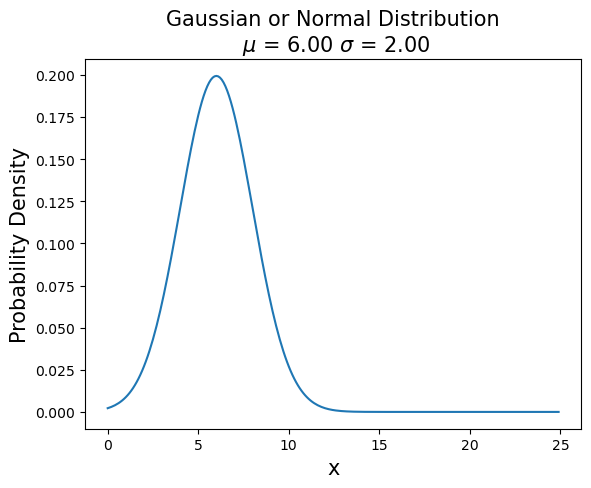

In [43]:
u, s = 6, 2
x = np.arange(0,25,0.1)
y = 1/np.sqrt(2*np.pi*s*s)*np.exp(-(x-u)**2/(2*s*s))
plt.plot(x, y, '-')
plt.title('Gaussian or Normal Distribution\n $\mu$ = %0.2f $\sigma$ = %0.2f' %(u,s), fontsize = 15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.show()

The expression:

```python
x1 = np.random.normal(15)
```

calls NumPy's `np.random.normal()` function, which generates a random sample from a **normal (Gaussian) distribution**.

### Breakdown:

```python
np.random.normal(loc=15)
```

This is equivalent to:

```python
np.random.normal(loc=15, scale=1.0, size=None)
```

So:

* `loc=15`: the **mean** (μ) of the distribution.
* `scale=1.0`: the **standard deviation** (σ).
* `size=None`: returns a **single scalar** value.

### Therefore:

`x1` will be a single float value drawn from a normal distribution with:

* Mean = 15
* Standard deviation = 1

#### Example:

```python
>>> np.random.normal(15)
15.34282120231336
```

Each time you run it, you'll get a **different** number, but most of them will be clustered around 15.


The expression:

```python
x = np.linspace(0, 10, 100)
```

uses NumPy’s `linspace()` function to create a **linearly spaced array**.

### Breakdown:

```python
np.linspace(start=0, stop=10, num=100)
```

* `start=0`: the first value in the array.
* `stop=10`: the last value in the array (inclusive).
* `num=100`: generate **100 evenly spaced values** between 0 and 10.

### So:

`x` will be a NumPy array like this:

```python
array([ 0.        ,  0.1010101 ,  0.2020202 , ..., 9.7979798 , 9.8989899 , 10.       ])
```

It is often used for plotting or creating a domain over which a function is evaluated.


x1 = np.random.normal(-1, 2, 15)
The line:

```python
x1 = np.random.normal(-1, 2, 15)
```

generates random numbers from a **normal (Gaussian) distribution**, using:

### Parameters:

* `loc=-1`: the **mean (μ)** of the distribution.
* `scale=2`: the **standard deviation (σ)** — how spread out the numbers are.
* `size=15`: generate an array of **15 values**.

### So:

`x1` will be a NumPy array of 15 random numbers, drawn from a normal distribution centered at -1, with a standard deviation of 2.

#### Example:

```python
array([-3.45, -1.23, 0.02, -2.34, -1.87, -0.65, ..., -0.95])
```

The values will vary each time you run it, but most will lie within the range:

$$
\text{mean} \pm 3 \times \text{std} = -1 \pm 6 \Rightarrow \text{roughly between } -7 \text{ and } 5
$$


Brother, let’s break down the code you provided, focusing on how it works underneath in a moderately brief way.

1. **Concatenation with `np.r_`**:
   ```python
   y = np.r_[x1, x2]
   ```
   - **What it does**: `np.r_` is a NumPy utility that concatenates arrays `x1` and `x2` along the first axis (row-wise for 1D arrays, vertically for 2D). It treats `x1` and `x2` as sequences and combines them into a single array `y`.
   - **Under the hood**: If `x1` and `x2` are 1D arrays, say `[1, 2]` and `[3, 4]`, `np.r_` stacks them into `[1, 2, 3, 4]`. It’s a shorthand for `np.concatenate((x1, x2))` but can also handle slice-like inputs (e.g., `np.r_[0:5]`). Here, it assumes `x1` and `x2` are compatible arrays.
   - **Purpose**: Creates a combined dataset `y` from two input arrays for further processing.

2. **Generating evenly spaced points with `np.linspace`**:
   ```python
   x = np.linspace(min(y), max(y), 100)
   ```
   - **What it does**: Creates an array `x` with 100 evenly spaced points between the minimum and maximum values of `y`.
   - **Under the hood**: `np.linspace` computes the range (`min(y)` to `max(y)`) and divides it into 100 equal intervals. For example, if `y = [1, 2, 3, 4]`, `min(y) = 1`, `max(y) = 4`, so `x` is an array like `[1.0, 1.03, ..., 3.97, 4.0]`.
   - **Purpose**: Provides a smooth grid of points for evaluating a continuous function (here, likely for kernel density estimation).

3. **Smoothing parameter**:
   ```python
   s = 0.4
   ```
   - **What it does**: Defines a smoothing parameter `s` (bandwidth) for kernel density estimation.
   - **Under the hood**: In kernel density estimation, `s` controls the spread of the kernel function (here, a Gaussian). A smaller `s` makes the estimate more sensitive to individual data points, while a larger `s` smooths the estimate more.
   - **Purpose**: Sets the scale for how much each data point in `y` influences the density estimate.

4. **Calculating kernels**:
   ```python
   kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
   ```
   - **What it does**: Computes a Gaussian kernel for each data point `yi` in `y`, evaluated over the grid `x`, with standard deviation `s`. The result is transposed for plotting.
   - **Under the hood**: 
     - `norm.pdf(x, yi, s)` from SciPy’s `stats` module calculates the probability density function of a normal (Gaussian) distribution centered at `yi` with standard deviation `s`, evaluated at all points in `x`.
     - The list comprehension `[norm.pdf(x, yi, s) for yi in y]` creates a list of arrays, where each array is the kernel for a single `yi`.
     - `np.transpose` reshapes the result so each row corresponds to a point in `x`, and each column corresponds to a kernel for a `yi`. If `y` has `n` points and `x` has 100 points, the result is a `(100, n)` array.
   - **Purpose**: Generates the individual kernel contributions for kernel density estimation.

5. **Plotting the kernels**:
   ```python
   plt.plot(x, kernels, 'k:')
   ```
   - **What it does**: Plots each kernel (column of `kernels`) against `x` using black dotted lines (`'k:'`).
   - **Under the hood**: Matplotlib’s `plt.plot` treats each column of `kernels` as a separate line. Each line represents the Gaussian density centered at a `yi`, spread by `s`, evaluated over `x`.
   - **Purpose**: Visualizes the individual contributions of each data point to the density estimate.

6. **Plotting the summed kernel**:
   ```python
   plt.plot(x, kernels.sum(1), 'r')
   ```
   - **What it does**: Sums the kernels along axis 1 (across columns) to get the total density estimate and plots it in red (`'r'`).
   - **Under the hood**: `kernels.sum(1)` computes the sum of all kernel contributions at each point in `x`, resulting in a 1D array of length 100. This is the kernel density estimate, a smoothed version of the data distribution.
   - **Purpose**: Shows the overall density estimate, combining the influence of all data points.

7. **Plotting data points**:
   ```python
   plt.plot(y, np.zeros(len(y)), 'go', ms=10)
   ```
   - **What it does**: Plots the original data points in `y` at y-coordinate 0, using green circles (`'go'`) with marker size 10 (`ms=10`).
   - **Under the hood**: `np.zeros(len(y))` creates an array of zeros matching the length of `y`, so each point in `y` is plotted at height 0 on the y-axis. The `'go'` specifies green (`g`) circles (`o`).
   - **Purpose**: Marks the locations of the original data points on the x-axis for reference.

**Overall Context**:
This code performs kernel density estimation (KDE) to estimate the probability density of the data in `y`. It uses Gaussian kernels with bandwidth `s` to smooth the data, evaluates the density on a grid `x`, and visualizes both the
individual kernels and their sum (the density estimate). The data points are shown as markers at y=0. KDE is a non-parametric way to estimate the underlying distribution of data, useful for visualizing data distributions without assuming a specific form.

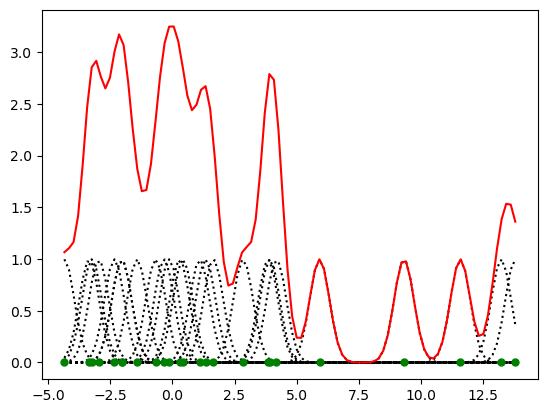

In [74]:
from scipy.stats.distributions import norm
y = np.random.normal(15)*10
x = np.linspace(0, 10, 100)

x1 = np.random.normal(-1, 2, 15)
x2 = np.random.normal(6, 3, 10)
y = np.r_[x1, x2] #concatenates x1 and x2
x = np.linspace(min(y), max(y), 100)

'''This is the bandwidth (standard deviation) of the Gaussian kernels.
Smaller s → sharper peaks, larger s → smoother curves.'''
s = 0.4

#calculates the kernel
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
# print(kernels)
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'go', ms=5)
plt.show()

/tmp/ipykernel_39469/1008215592.py:11: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(y)


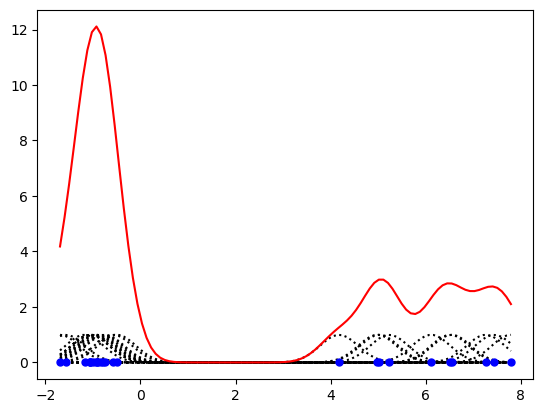

In [75]:
from scipy.stats import kde

x1 = np.random.normal(-1, 0.5, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.
x = np.linspace(min(y), max(y), 100)

s = 0.4 # Smoothing parameter

kernels = np.transpose([norm.pdf(x, yi, s) for yi in y]) # Calculate the kernels
density = kde.gaussian_kde(y)

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms=5)
plt.show()

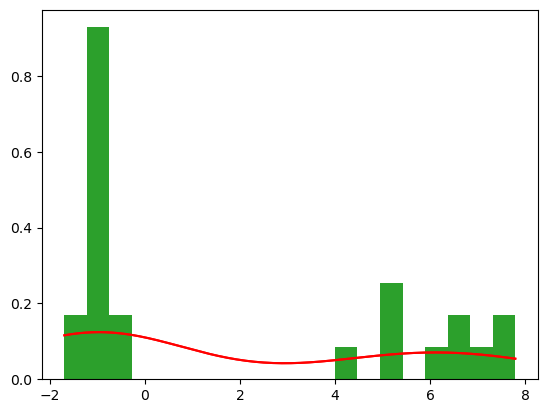

In [79]:
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=20, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

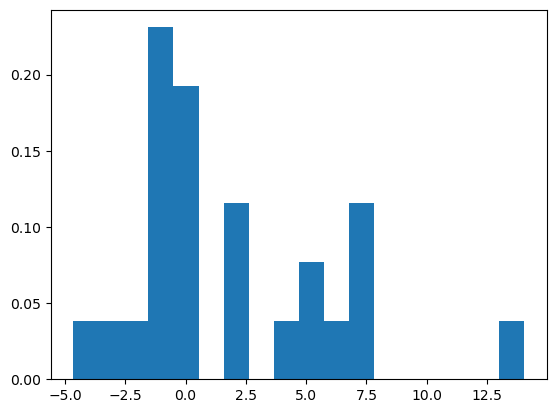

In [88]:
x1 = np.random.normal(-1, 2, 15)
x2 = np.random.normal(6, 3, 10)
x = np.r_[x1, x2]
plt.hist(x, bins=18, density = True)
plt.show()

/tmp/ipykernel_39469/3704902283.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(x)


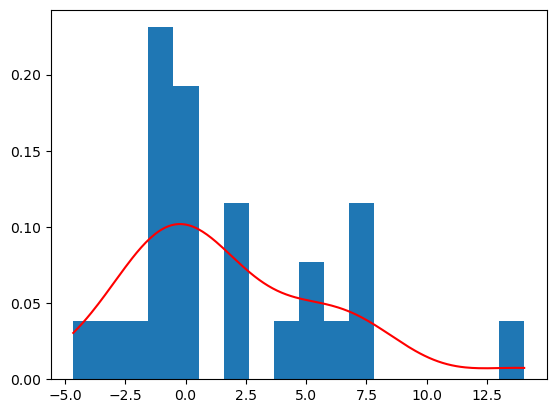

In [89]:
density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

In [93]:
NTests = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range(NTests):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean()-mu)**2
print('Mean Squared Error: ', err/NTests) 

Mean Squared Error:  0.0009953911694657413
